In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [18]:
rent_df = pd.read_csv('House_Rent_Dataset.csv.csv')

In [19]:
rent_df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [20]:
print("(rows, columns) :" , rent_df.shape)

(rows, columns) : (4746, 12)


In [21]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [24]:
# finding outliers 
def find_outlier(column):
    # UC = MEAN + 2 STD
    upper_threshold = column.mean() + (2 * column.std())
    lower_threshold = column.mean() - (2 * column.std())
    
    for var in column:
        if var < lower_threshold or var > upper_threshold:
            count = 1            # This means that column is having an OUTLIER
        else:
            count = 0            # That column is not having an outliers
    
    outlier_flag = count
    return pd.Series([
        column.count(), column.isnull().sum(), column.sum(), column.mean(), column.median(), column.std(),
        column.var(), column.min(), column.quantile(0.01), column.quantile(0.05), column.quantile(0.10),
        column.quantile(0.25), column.quantile(0.50), column.quantile(0.75),
        column.quantile(0.90), column.quantile(0.95), column.quantile(0.99), column.max(),
        lower_threshold, upper_threshold, outlier_flag
    ], index=[
        'N', 'NMISS', 'SUM', 'MEAN', 'MEDIAN', 'STD', 'VAR', 'MIN',
        'P1', 'P5', 'P10', 'P25', 'P50', 'P75', 'P90', 'P95', 'P99',
        'MAX', 'LC', 'UC', 'outlier_flag'
    ])




In [28]:
numeric_columns = []
for cols in rent_df:
    if rent_df[cols].dtypes == 'int64':
        numeric_columns.append(cols)

print(numeric_columns)

['BHK', 'Rent', 'Size', 'Bathroom']


In [29]:
rent_df[numeric_columns].apply(lambda x: find_outlier(x))


,BHK,Rent,Size,Bathroom
N,4746.000000,4.746000e+03,4.746000e+03,4746.000000
NMISS,0.000000,0.000000e+00,0.000000e+00,0.000000
SUM,9890.000000,1.660789e+08,4.591711e+06,9330.000000
MEAN,2.083860,3.499345e+04,9.674907e+02,1.965866
MEDIAN,2.000000,1.600000e+04,8.500000e+02,2.000000
STD,0.832256,7.810641e+04,6.342023e+02,0.884532
VAR,0.692650,6.100612e+09,4.022126e+05,0.782396
MIN,1.000000,1.200000e+03,1.000000e+01,1.000000
P1,1.000000,4.000000e+03,7.000000e+01,1.000000
P5,1.000000,6.000000e+03,2.000000e+02,1.000000


In [30]:
#Visualizing Rental Data for Outlier Detection and Insights
#Box Plot of rent

<Axes: xlabel='Rent'>

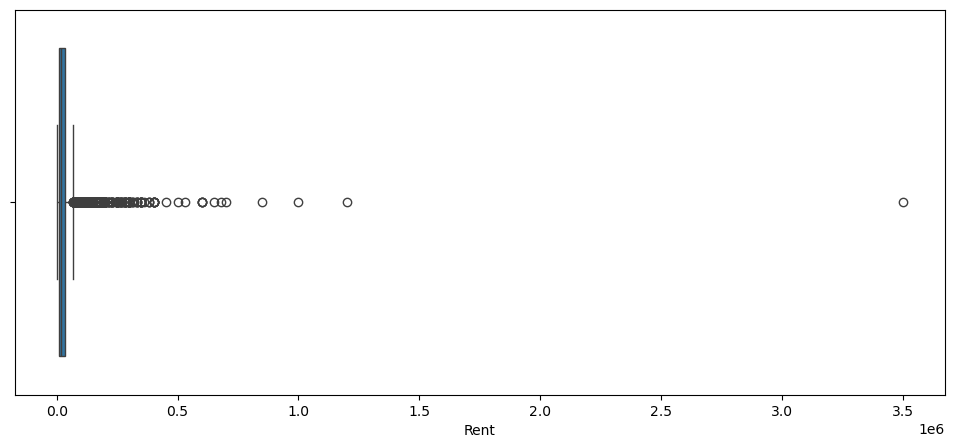

In [31]:
plt.figure(figsize=(12,5))
sns.boxplot(data=rent_df, x='Rent')


<Axes: xlabel='Rent'>

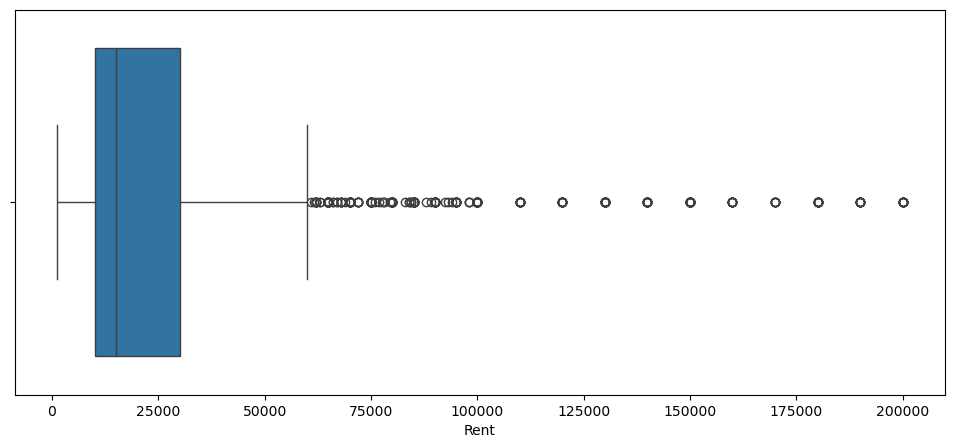

In [32]:
rent_df = rent_df[rent_df['Rent'] <= 200000]
plt.figure(figsize=(12,5))
sns.boxplot(data = rent_df, x = 'Rent')


<Axes: xlabel='City', ylabel='Rent'>

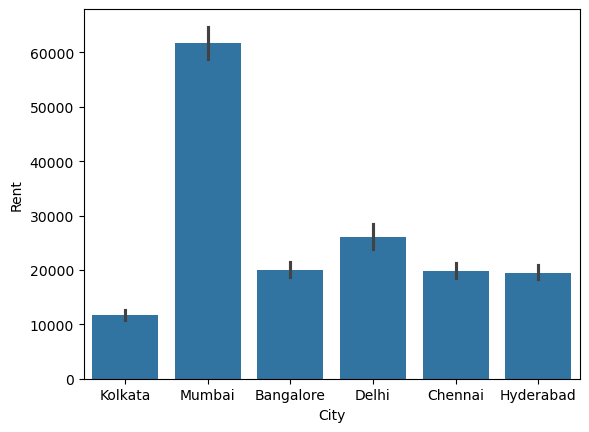

In [33]:
sns.barplot(data = rent_df, x = 'City', y = 'Rent')
# It seems that Mumbai has the highest Rent amongst all.


<Axes: xlabel='City', ylabel='Rent'>

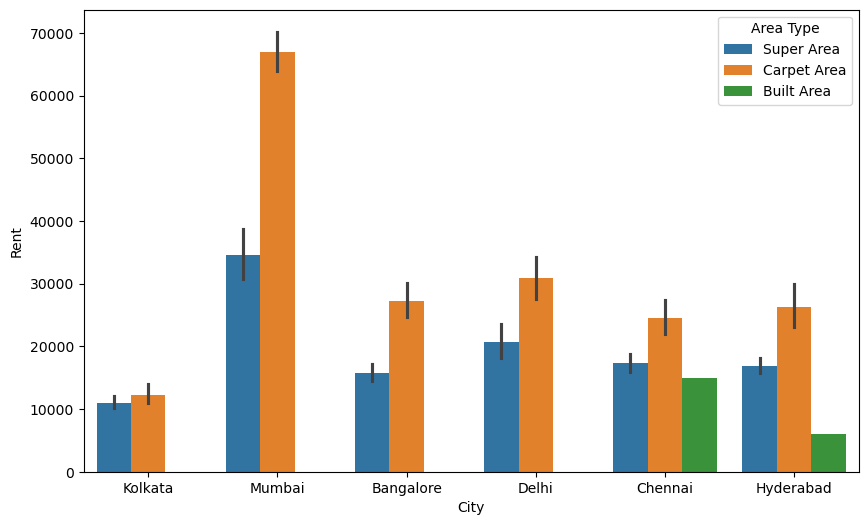

In [34]:
rent_df['Area Type'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(data = rent_df, x = 'City', y = 'Rent', hue = 'Area Type')



<Axes: xlabel='City', ylabel='Rent'>

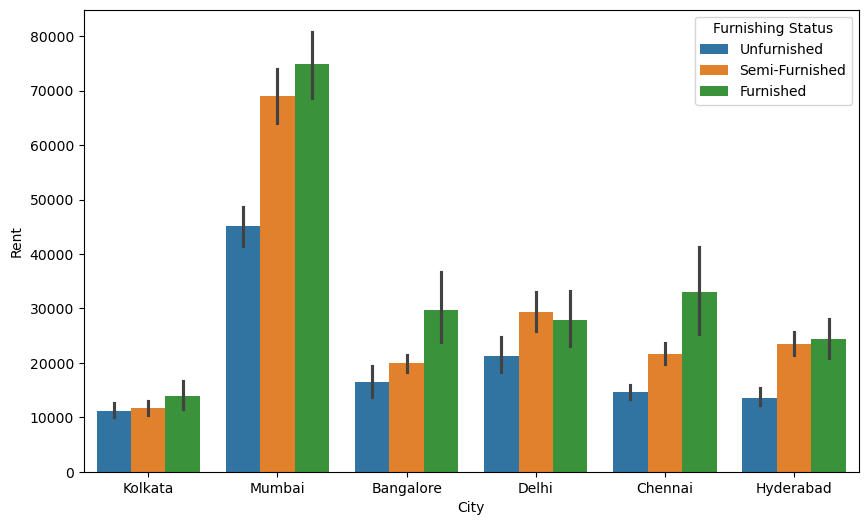

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data = rent_df, x = 'City', y = 'Rent', hue = 'Furnishing Status')


<Axes: xlabel='City', ylabel='Rent'>

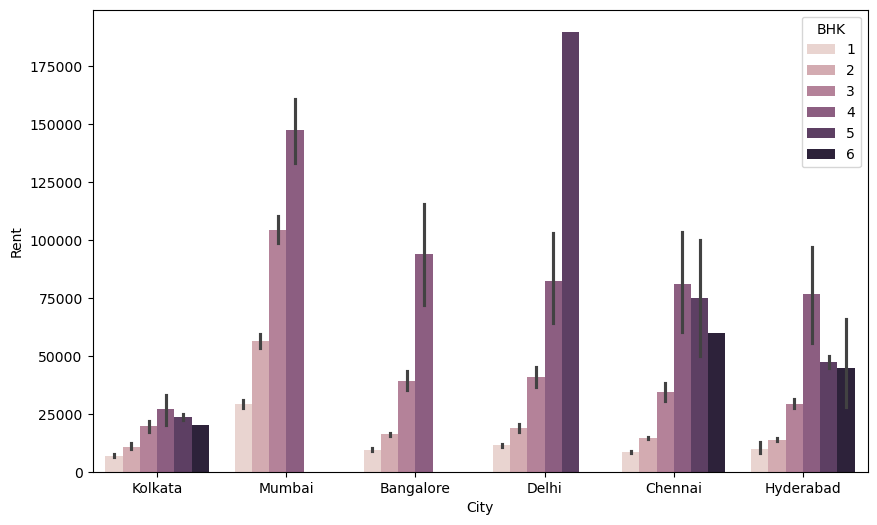

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(data = rent_df, x = 'City', y = 'Rent', hue = 'BHK')


In [37]:
rent_df[rent_df['BHK'] ==6]

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
83,2022-06-21,6,20000,1000,1 out of 1,Super Area,Sonarpur,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner
3584,2022-06-02,6,60000,1800,1 out of 3,Super Area,Besant Nagar,Chennai,Furnished,Bachelors/Family,6,Contact Owner
4350,2022-06-18,6,60000,2800,Ground out of 3,Super Area,"Boduppal, NH 2 2",Hyderabad,Furnished,Bachelors/Family,7,Contact Owner
4479,2022-07-07,6,20000,2400,Ground out of 1,Super Area,"Mallikarjuna Nagar, Secunderabad",Hyderabad,Unfurnished,Family,4,Contact Owner
4518,2022-05-12,6,35000,3400,Ground out of 2,Super Area,Rampally,Hyderabad,Unfurnished,Bachelors/Family,7,Contact Owner
4648,2022-07-06,6,80000,4500,1 out of 2,Super Area,"Kakateeya Nagar, Secunderabad",Hyderabad,Semi-Furnished,Bachelors/Family,6,Contact Owner
4696,2022-07-06,6,30000,4200,Ground out of 2,Super Area,Kuntloor,Hyderabad,Semi-Furnished,Bachelors/Family,5,Contact Owner


<Axes: xlabel='City', ylabel='Rent'>

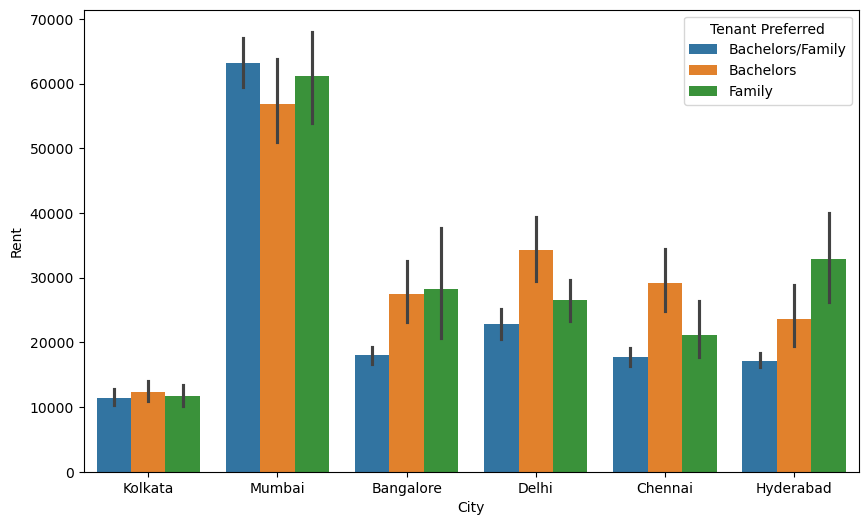

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data = rent_df, x = 'City', y = 'Rent', hue = 'Tenant Preferred')


In [39]:
# WHAT ARE WE GONNA DO WITH 6-10 BATHROOMS??
rent_df['Bathroom'].value_counts()


Bathroom
2     2285
1     1474
3      732
4      116
5       28
6        8
7        3
10       1
Name: count, dtype: int64

In [40]:
rent_df['Bathroom'].value_counts()


Bathroom
2     2285
1     1474
3      732
4      116
5       28
6        8
7        3
10       1
Name: count, dtype: int64

<Axes: xlabel='City', ylabel='Rent'>

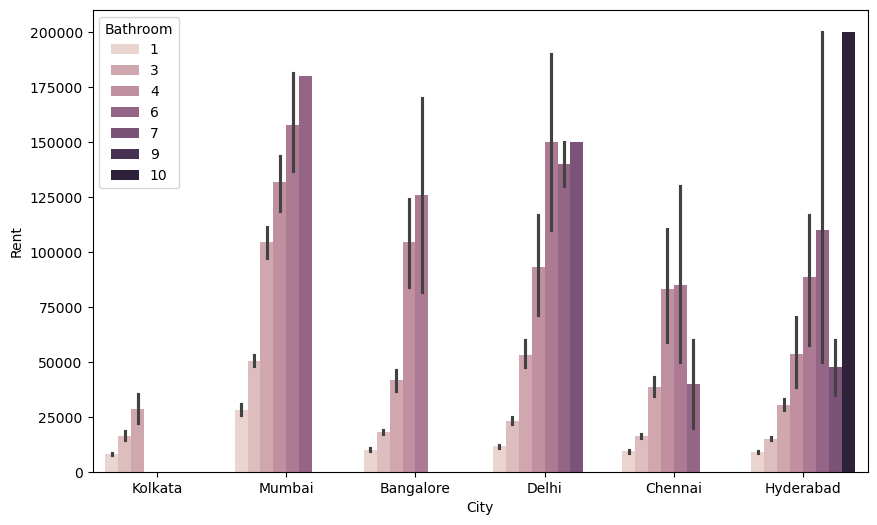

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data = rent_df, x = 'City', y = 'Rent', hue = 'Bathroom')


In [42]:
rent_df['Bathroom'].value_counts()


Bathroom
2     2285
1     1474
3      732
4      116
5       28
6        8
7        3
10       1
Name: count, dtype: int64

In [43]:
# Les drop 5 and 6 BHK, cause they wont contribute that much.
rent_df['BHK'].value_counts()


BHK
2    2261
1    1167
3    1071
4     134
6       7
5       7
Name: count, dtype: int64

In [44]:
rent_df['Bathroom'].value_counts()


Bathroom
2     2285
1     1474
3      732
4      116
5       28
6        8
7        3
10       1
Name: count, dtype: int64

In [45]:
# Les drop 5 and 6 BHK, cause they wont contribute that much.
rent_df['BHK'].value_counts()


BHK
2    2261
1    1167
3    1071
4     134
6       7
5       7
Name: count, dtype: int64

In [46]:
valid_rooms = [1, 2, 3, 4]
rent_df = rent_df[rent_df['BHK'].isin(valid_rooms)]


<Axes: xlabel='City', ylabel='Rent'>

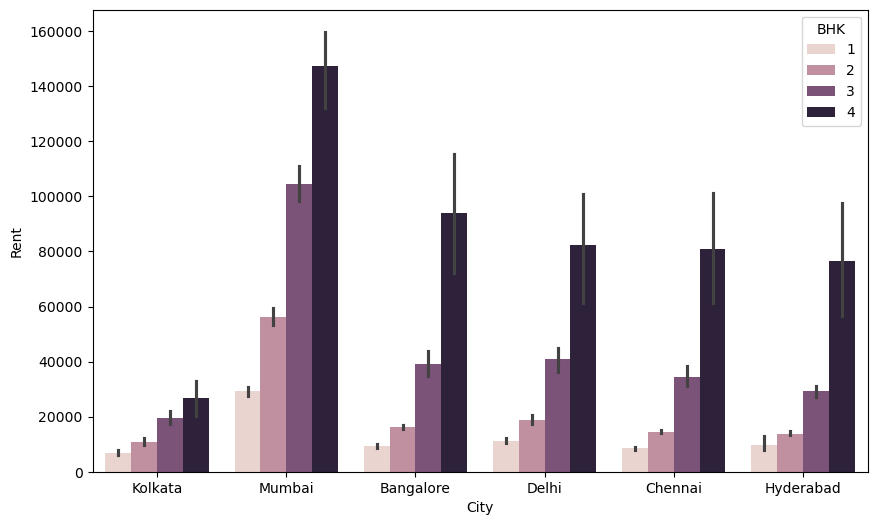

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(data = rent_df, x = 'City', y = 'Rent', hue = 'BHK')
